Read the experiment results/logs

In [1]:
import numpy as np
import pandas as pd

from pathlib import Path
from datetime import datetime
import json
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib
matplotlib.use('Agg')       # Use non-interactive backend for matplotlib to save memory

from utils import print_log

Experiment folder

In [2]:
expt_datetime = datetime(2025, 7, 23, 18, 33, 9)
result_phrase = "train"  # or "test" or "validate"

expt_folder = Path("experiments") / expt_datetime.strftime("%Y%m%d_%H%M%S") / ("logs_" + result_phrase)

if not expt_folder.exists():
    print_log(f"Experiment folder {expt_folder} does not exist. Please check the path.")

Before hand, we read the env config json and display information

In [4]:
env_config_path = expt_folder / "env_config.json"
if not env_config_path.exists():
    print_log(f"Environment config file {env_config_path} does not exist. Please check the path.")

# Load environment configuration
with open(env_config_path, 'r') as f:
    env_config = json.load(f)

# Display environment configuration
print_log("Environment Configuration:")
for key, value in env_config.items():
    print_log(f"{key}: {value}")

[2025-07-24 15:02:46:833] Environment config file experiments/20250723_183309/logs_train/env_config.json does not exist. Please check the path.


FileNotFoundError: [Errno 2] No such file or directory: 'experiments/20250723_183309/logs_train/env_config.json'

In [3]:
# max_battery_capacity = env_config.get("battery").get("capacity", 8)
max_battery_capacity = 8

First, we read the progress.json of the selected phrase

In [4]:
from stable_baselines3.common.logger import read_json

# Read the logged .json file and open it as a Dataframe
log_file_path = expt_folder / "progress.json"
if log_file_path.exists():
    log_data = read_json(log_file_path)

log_data

2025-07-24 17:35:11.570527: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-07-24 17:35:11.701049: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1753374911.747151  727127 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1753374911.761880  727127 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1753374911.870951  727127 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking 

time/iterations  rollout/ep_rew_mean  rollout/ep_len_mean  time/fps  \
0                  1            42.078756               1439.0       222   
1                  2            46.957979               1439.0       165   
2                  3            47.882200               1439.0       167   
3                  4            63.500167               1439.0        69   
4                  5            60.108112               1439.0        76   
..               ...                  ...                  ...       ...   
416              417           103.454047               1439.0        46   
417              418           102.783235               1439.0        46   
418              419           102.735450               1439.0        45   
419              420           102.546448               1439.0        45   
420              421           102.453903               1439.0        45   

     time/time_elapsed  time/total_timesteps  train/learning_rate  \
0                    9                  2048                  NaN   
1                   24                  4096               0.0003   
2                   36                  6144               0.0003   
3                  118                  8192               0.0003   
4                  133                 10240               0.0003   
..                 ...                   ...                  ...   
416              18368                854016               0.0003   
417              18380                856064               0.0003   
418              18898                858112               0.0003   
419              18910                860160               0.0003   
420              18922                862208               0.0003   

     train/entropy_loss  train/policy_gradient_loss  train/value_loss  \
0                   NaN                         NaN               NaN   
1             -1.405441                   -0.000845          0.119370   
2             -1.401916                   -0.000660          0.116714   
3             -1.407742                   -0.001686          0.217305   
4             -1.401228                   -0.001934          0.268389   
..                  ...                         ...               ...   
416            1.652333                    0.002191          0.121250   
417            1.659393                    0.002715          0.138153   
418            1.670893                   -0.000636          0.247064   
419            1.670557                    0.003115          0.173802   
420            1.667354                    0.004455          0.085927   

     train/approx_kl  train/clip_fraction  train/loss  \
0                NaN                  NaN         NaN   
1           0.001709             0.002637    0.062770   
2           0.001745             0.005713    0.033928   
3           0.003285             0.012744    0.058583   
4           0.003398             0.013623    0.183650   
..               ...                  ...         ...   
416         0.011161             0.081738    0.052921   
417         0.010183             0.120459    0.031239   
418         0.007760             0.117383    0.101720   
419         0.011152             0.099023    0.027718   
420         0.019753             0.093555    0.014453   

     train/explained_variance  train/std  train/n_updates  train/clip_range  
0                         NaN        NaN              NaN               NaN  
1                   -0.182709   0.974949             10.0               0.2  
2                   -0.296831   0.990114             20.0               0.2  
3                    0.215781   0.985339             30.0               0.2  
4                    0.518927   0.977463             40.0               0.2  
..                        ...        ...              ...               ...  
416                  0.982893   0.046517           4160.0               0.2  
417                  0.980669   0.045612           4170.0               0.2  

We then read the `h_network_<result_phrase>_loss_list.json`, and load it to a dataframe as well

`h_network_<result_phrase>_loss_list.json` is a json list

In [5]:
import json

h_network_loss_list_path = expt_folder / f"h_network_{result_phrase}_loss_list.json"
if h_network_loss_list_path.exists():
    with open(h_network_loss_list_path, "r") as f:
        h_network_loss_list = json.load(f)

    # Convert the list to a DataFrame
    h_network_loss_df = pd.DataFrame(h_network_loss_list)

In [7]:
h_network_loss_df

mean_loss  std_loss  num_batches
0     0.526298  0.061240            2
1     0.529979  0.022001            2
2     0.480346  0.013059            2
3     0.385339  0.042875            2
4     0.339727  0.041836            2
..         ...       ...          ...
196  -1.548855  0.012871            2
197  -1.551838  0.067442            2
198  -1.603599  0.048013            2
199  -1.727575  0.018098            2
200  -1.860300  0.017269            2

[201 rows x 3 columns]

We also read the reward of each episode from the agent interacting with the env

In [8]:
episodes_rewards_path = expt_folder / f"episodes_rewards.json"
if episodes_rewards_path.exists():
    with open(episodes_rewards_path, "r") as f:
        episodes_rewards = json.load(f)

    # Convert the list to a DataFrame
    episodes_rewards_df = pd.DataFrame(episodes_rewards)

episodes_rewards_df

sum      mean       std
0       49.686275  0.034528  0.032440
1       61.031134  0.042412  0.041941
2       58.610308  0.040730  0.039353
3       54.500290  0.037874  0.044109
4      133.757337  0.092952  0.070679
...           ...       ...       ...
1004 -1501.881214 -1.043698  1.342604
1005  -454.899031 -0.316122  0.984537
1006  -192.422457 -0.133720  0.653402
1007  -667.661788 -0.463976  0.813389
1008    22.482948  0.015624  0.282831

[1009 rows x 3 columns]

We also load the information of each episode into a list of dataframes

In [ ]:
episode_info_folder = expt_folder / "episode_info"
if episode_info_folder.exists():
    episode_info_files = sorted(list(episode_info_folder.glob("*.json")))
    episode_info_dfs = []

    for file in episode_info_files:
        with open(file, "r") as f:
            episode_info = json.load(f)
            df = pd.DataFrame(episode_info)
            # add a column for the episode number
            df['episode'] = int(file.stem.split('_')[1])  # Assuming the file name is like "episode_0_info.json", "episode_1_info.json", etc.
            # convert the datetime strings to datetime objects using python isoformat
            df['datetime'] = pd.to_datetime(df['datetime'], format='ISO8601')

            # temporary fix
            # we shift "grid_load (W)", "action (kW)", "battery_action (kW)", "reward", "f_signal", "g_signal" columns to the a timestep forward, then drop the last row for each episode
            df['grid_load (W)'] = df['grid_load (W)'].shift(-1)
            df['action (kW)'] = df['action (kW)'].shift(-1)
            df['battery_action (kW)'] = df['battery_action (kW)'].shift(-1)
            df['reward'] = df['reward'].shift(-1)
            df['f_signal'] = df['f_signal'].shift(-1)
            df['g_signal'] = df['g_signal'].shift(-1)
            # remove the last row for each episode
            df = df[:-1]

            episode_info_dfs.append(df)

            print_log(f"Loaded episode info from {file.name}")

    # Concatenate all DataFrames into one
    episode_info_df = pd.concat(episode_info_dfs, ignore_index=True)
    

[2025-07-24 15:11:48:056] Loaded episode info from episode_0001_info.json
[2025-07-24 15:11:48:063] Loaded episode info from episode_0002_info.json
[2025-07-24 15:11:48:069] Loaded episode info from episode_0003_info.json
[2025-07-24 15:11:48:076] Loaded episode info from episode_0004_info.json
[2025-07-24 15:11:48:082] Loaded episode info from episode_0005_info.json
[2025-07-24 15:11:48:087] Loaded episode info from episode_0006_info.json
[2025-07-24 15:11:48:093] Loaded episode info from episode_0007_info.json
[2025-07-24 15:11:48:098] Loaded episode info from episode_0008_info.json
[2025-07-24 15:11:48:104] Loaded episode info from episode_0009_info.json
[2025-07-24 15:11:48:109] Loaded episode info from episode_0010_info.json
[2025-07-24 15:11:48:115] Loaded episode info from episode_0011_info.json
[2025-07-24 15:11:48:120] Loaded episode info from episode_0012_info.json
[2025-07-24 15:11:48:126] Loaded episode info from episode_0013_info.json
[2025-07-24 15:11:48:131] Loaded episo

In [6]:
episode_info_df.head(20)

episode_index  current_step            datetime  battery_soc (%)  \
0              96             0 2013-08-28 00:00:02         0.150000   
1              96             1 2013-08-28 00:01:02         0.151042   
2              96             2 2013-08-28 00:02:02         0.155464   
3              96             3 2013-08-28 00:03:02         0.162653   
4              96             4 2013-08-28 00:04:02         0.170987   
5              96             5 2013-08-28 00:05:02         0.177195   
6              96             6 2013-08-28 00:06:02         0.176566   
7              96             7 2013-08-28 00:07:02         0.181215   
8              96             8 2013-08-28 00:08:02         0.180594   
9              96             9 2013-08-28 00:09:02         0.188927   
10             96            10 2013-08-28 00:10:02         0.188312   
11             96            11 2013-08-28 00:11:02         0.189574   
12             96            12 2013-08-28 00:12:02         0.197907   
13             96            13 2013-08-28 00:13:02         0.197299   
14             96            14 2013-08-28 00:14:02         0.205632   
15             96            15 2013-08-28 00:15:02         0.209186   
16             96            16 2013-08-28 00:16:02         0.208577   
17             96            17 2013-08-28 00:17:02         0.207967   
18             96            18 2013-08-28 00:18:02         0.209713   
19             96            19 2013-08-28 00:19:02         0.209248   

    battery_soc (kWh)  user_load (W)  grid_load (W)  action (kW)  \
0            1.200000     304.000000            NaN          NaN   
1            1.208340     301.620664     804.377238     0.500377   
2            1.243711     302.718374    2423.906984     2.122286   
3            1.301226     307.954288    3753.618213     3.450900   
4            1.367893     300.548825    4307.954288     4.000000   
5            1.417558     301.786413    3280.452285     2.979903   
6            1.412528     295.105055       0.000000    -1.404598   
7            1.449719     298.141884    2526.569203     2.231464   
8            1.444750     298.852069       0.000000    -4.000000   
9            1.511417     295.157742    4298.852069     4.000000   
10           1.506497     297.768258       0.000000    -2.003946   
11           1.516591     294.148045     903.361164     0.605593   
12           1.583257     292.087376    4294.148045     4.000000   
13           1.578389     289.524251       0.000000    -4.000000   
14           1.645056     288.392771    4289.524251     4.000000   
15           1.673485     292.155333    1994.136084     1.705743   
16           1.668616     292.712060       0.000000    -1.453274   
17           1.663737     233.288495       0.000000    -0.872209   
18           1.677703     223.187484    1071.227518     0.837939   
19           1.673983     223.126766       0.000000    -2.098445   

    battery_action (kW)    reward  f_signal  g_signal  \
0                   NaN       NaN       NaN       NaN   
1              0.500377 -0.000239 -0.000364  0.000842   
2              2.122286 -0.001717 -0.000138  0.003573   
3              3.450900 -0.002885 -0.000039  0.005809   
4              4.000000 -0.003357 -0.000019  0.006733   
5              2.979903 -0.002507 -0.000002  0.005016   
6             -0.301786  0.000053 -0.000613  0.000508   
7              2.231464 -0.001758 -0.000241  0.003756   
8             -0.298142 -0.000012 -0.000477  0.000502   
9              4.000000 -0.003173 -0.000386  0.006733   
10            -0.295158  0.000007 -0.000510  0.000497   
11             0.605593 -0.000054 -0.000911  0.001019   
12             4.000000 -0.003048 -0.000637  0.006733   
13            -0.292087  0.000517 -0.001526  0.000492   
14             4.000000 -0.002858 -0.001018  0.006733   
15             1.705743 -0.001087 -0.000697  0.002871   
16            -0.292155  0.000288 -0.001067  0.000492   
17            -0.292712  0.012381 -0

In [7]:
episode_info_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 863537 entries, 0 to 863536
Data columns (total 17 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   episode_index               863537 non-null  int64         
 1   current_step                863537 non-null  int64         
 2   datetime                    863537 non-null  datetime64[ns]
 3   battery_soc (%)             863537 non-null  float64       
 4   battery_soc (kWh)           863537 non-null  float64       
 5   user_load (W)               863537 non-null  float64       
 6   grid_load (W)               862932 non-null  float64       
 7   action (kW)                 862932 non-null  float64       
 8   battery_action (kW)         862932 non-null  float64       
 9   reward                      862932 non-null  float64       
 10  f_signal                    862932 non-null  float64       
 11  g_signal                    862932 non-

In [8]:
# create episodes_rewards_df from episode_info_df
# compute the total reward, mean, and std for each episode
episodes_rewards_df = episode_info_df.groupby('episode').agg({
    'reward': ['sum', 'mean', 'std'],
}).reset_index()
episodes_rewards_df.columns = ['episode', 'sum', 'mean', 'std']

episodes_rewards_df

episode         sum      mean       std
0          1   42.078756  0.029242  0.028542
1          2   51.837202  0.036023  0.036967
2          3   50.878836  0.035357  0.032808
3          4   46.734005  0.032477  0.037457
4          5  125.972036  0.087541  0.064117
..       ...         ...       ...       ...
600      601   92.028513  0.063953  0.055902
601      602  110.620405  0.076873  0.055701
602      603  104.720307  0.072773  0.054318
603      604  187.039811  0.129979  0.050084
604      605   61.640973  0.134882  0.056994

[605 rows x 4 columns]

---

In [6]:
# attempt to read the episodes_df from logs_train as well
# those are .pkl dataframes

episodes_df_folder_path = expt_folder / "episodes_df"
if not episodes_df_folder_path.exists():
    print_log(f"Episodes DataFrame folder {episodes_df_folder_path} does not exist. Please check the path.")

episodes_df_files = sorted(list(episodes_df_folder_path.glob("*.pkl")))
episodes_df_list = []
for file in episodes_df_files:
    df = pd.read_pickle(file)
    episodes_df_list.append(df)

    print(f"Loaded episodes DataFrame from {file.name}")


Loaded episodes DataFrame from episode_0001.pkl
Loaded episodes DataFrame from episode_0002.pkl
Loaded episodes DataFrame from episode_0003.pkl
Loaded episodes DataFrame from episode_0004.pkl
Loaded episodes DataFrame from episode_0005.pkl
Loaded episodes DataFrame from episode_0006.pkl
Loaded episodes DataFrame from episode_0007.pkl
Loaded episodes DataFrame from episode_0008.pkl
Loaded episodes DataFrame from episode_0009.pkl
Loaded episodes DataFrame from episode_0010.pkl
Loaded episodes DataFrame from episode_0011.pkl
Loaded episodes DataFrame from episode_0012.pkl
Loaded episodes DataFrame from episode_0013.pkl
Loaded episodes DataFrame from episode_0014.pkl
Loaded episodes DataFrame from episode_0015.pkl
Loaded episodes DataFrame from episode_0016.pkl
Loaded episodes DataFrame from episode_0017.pkl
Loaded episodes DataFrame from episode_0018.pkl
Loaded episodes DataFrame from episode_0019.pkl
Loaded episodes DataFrame from episode_0020.pkl
Loaded episodes DataFrame from episode_0

In [7]:
episodes_df_list[0]

timestamp   aggregate            datetime    grid_load battery_soc  \
132191  1377648002  304.000000 2013-08-28 00:00:02   804.377238        0.15   
132192  1377648062  301.620664 2013-08-28 00:01:02  2423.906984    0.151042   
132193  1377648122  302.718374 2013-08-28 00:02:02  3753.618213    0.155464   
132194  1377648182  307.954288 2013-08-28 00:03:02  4307.954288    0.162653   
132195  1377648242  300.548825 2013-08-28 00:04:02  3280.452285    0.170987   
...            ...         ...                 ...          ...         ...   
133626  1377734102  212.814858 2013-08-28 23:55:02   425.652914    0.999557   
133627  1377734162  212.412497 2013-08-28 23:56:02   212.412497         1.0   
133628  1377734222  179.139330 2013-08-28 23:57:02          0.0         1.0   
133629  1377734282  155.433279 2013-08-28 23:58:02   334.572609    0.999627   
133630  1377734342  154.219873 2013-08-28 23:59:02         None        None   

        aggregate_std  
132191      -0.043110  
132192      -0.050192  
132193      -0.046925  
132194      -0.031338  
132195      -0.053383  
...               ...  
133626      -0.314553  
133627      -0.315751  
133628      -0.414800  
133629      -0.485369  
133630      -0.488981  

[1440 rows x 6 columns]

---

Lets plot a graph with three subplot, with the first is the sum of rewards across each episodes, and the second is the mean, and the third is the s.d. of the per-step reward

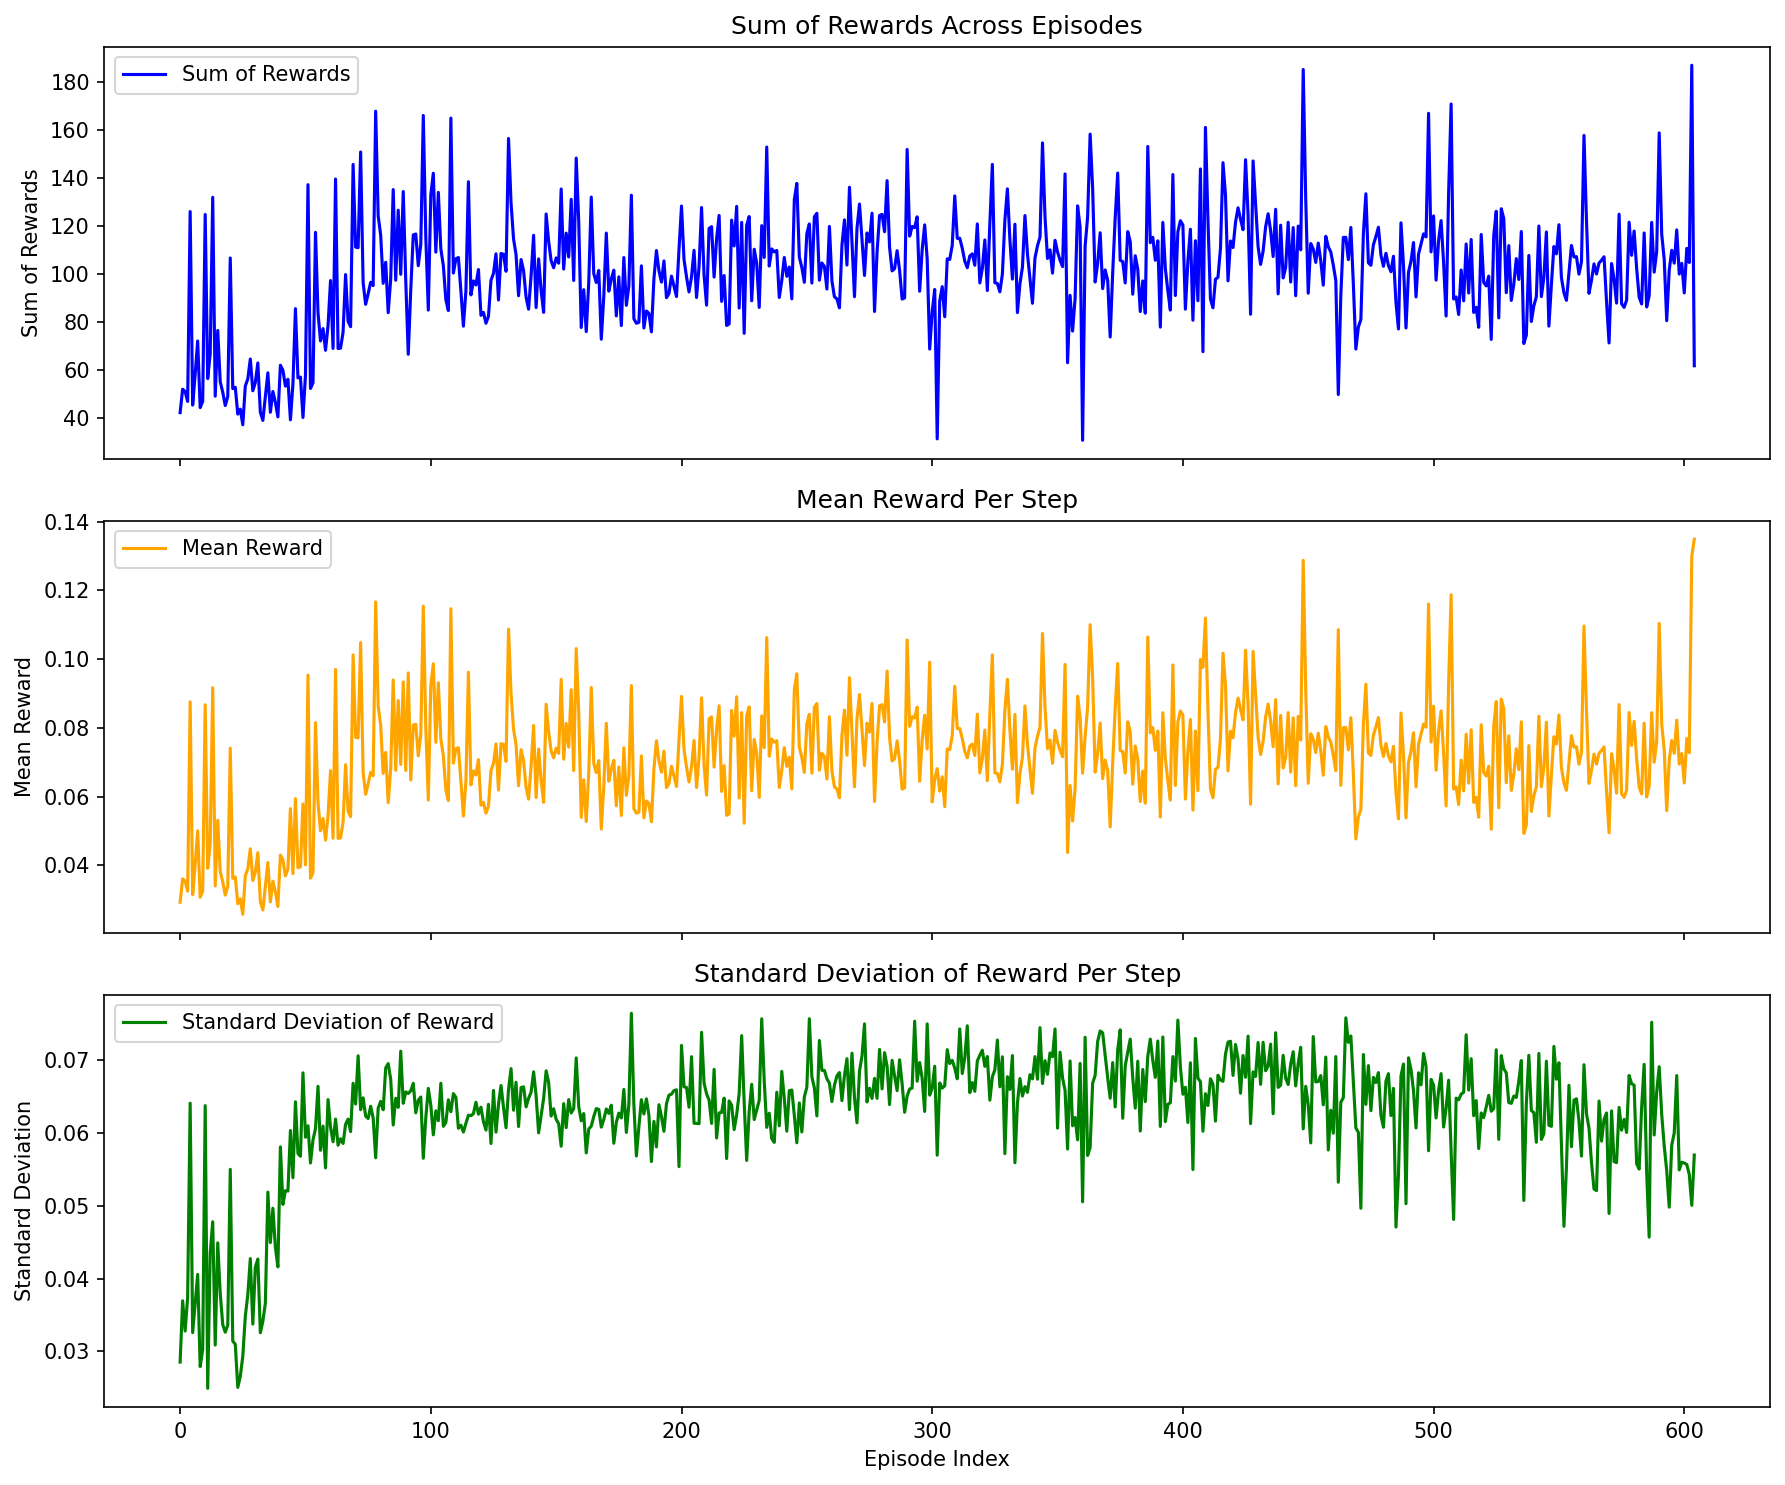

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

df_1 = episodes_rewards_df.reset_index()
df_1.rename(columns={"index": "episode_index"}, inplace=True)

# Plotting the results
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12, 10), sharex=True, dpi=150)
# Plot the sum of rewards across episodes
sns.lineplot(data=df_1, x="episode_index", y="sum", ax=ax1, label="Sum of Rewards", color="blue")
ax1.set_title("Sum of Rewards Across Episodes")
ax1.set_ylabel("Sum of Rewards")
ax1.legend()

# Plot the mean and std of per-step reward
# with the sd provided from df_1['std']
sns.lineplot(data=df_1, x="episode_index", y="mean", ax=ax2, label="Mean Reward", color="orange")
ax2.set_title("Mean Reward Per Step")
ax2.set_ylabel("Mean Reward")
ax2.legend()

# Plot the standard deviation of per-step reward
sns.lineplot(data=df_1, x="episode_index", y="std", ax=ax3, label="Standard Deviation of Reward", color="green")
ax3.set_title("Standard Deviation of Reward Per Step")
ax3.set_ylabel("Standard Deviation")
ax3.legend()

plt.xlabel("Episode Index")
plt.tight_layout()
plt.show()

# Save the figure
episodes_rewards_path = expt_folder / "graphs" / "episodes_rewards.png"
if not episodes_rewards_path.parent.exists():
    episodes_rewards_path.parent.mkdir(parents=True)
fig.savefig(episodes_rewards_path, dpi=300, bbox_inches='tight')

---

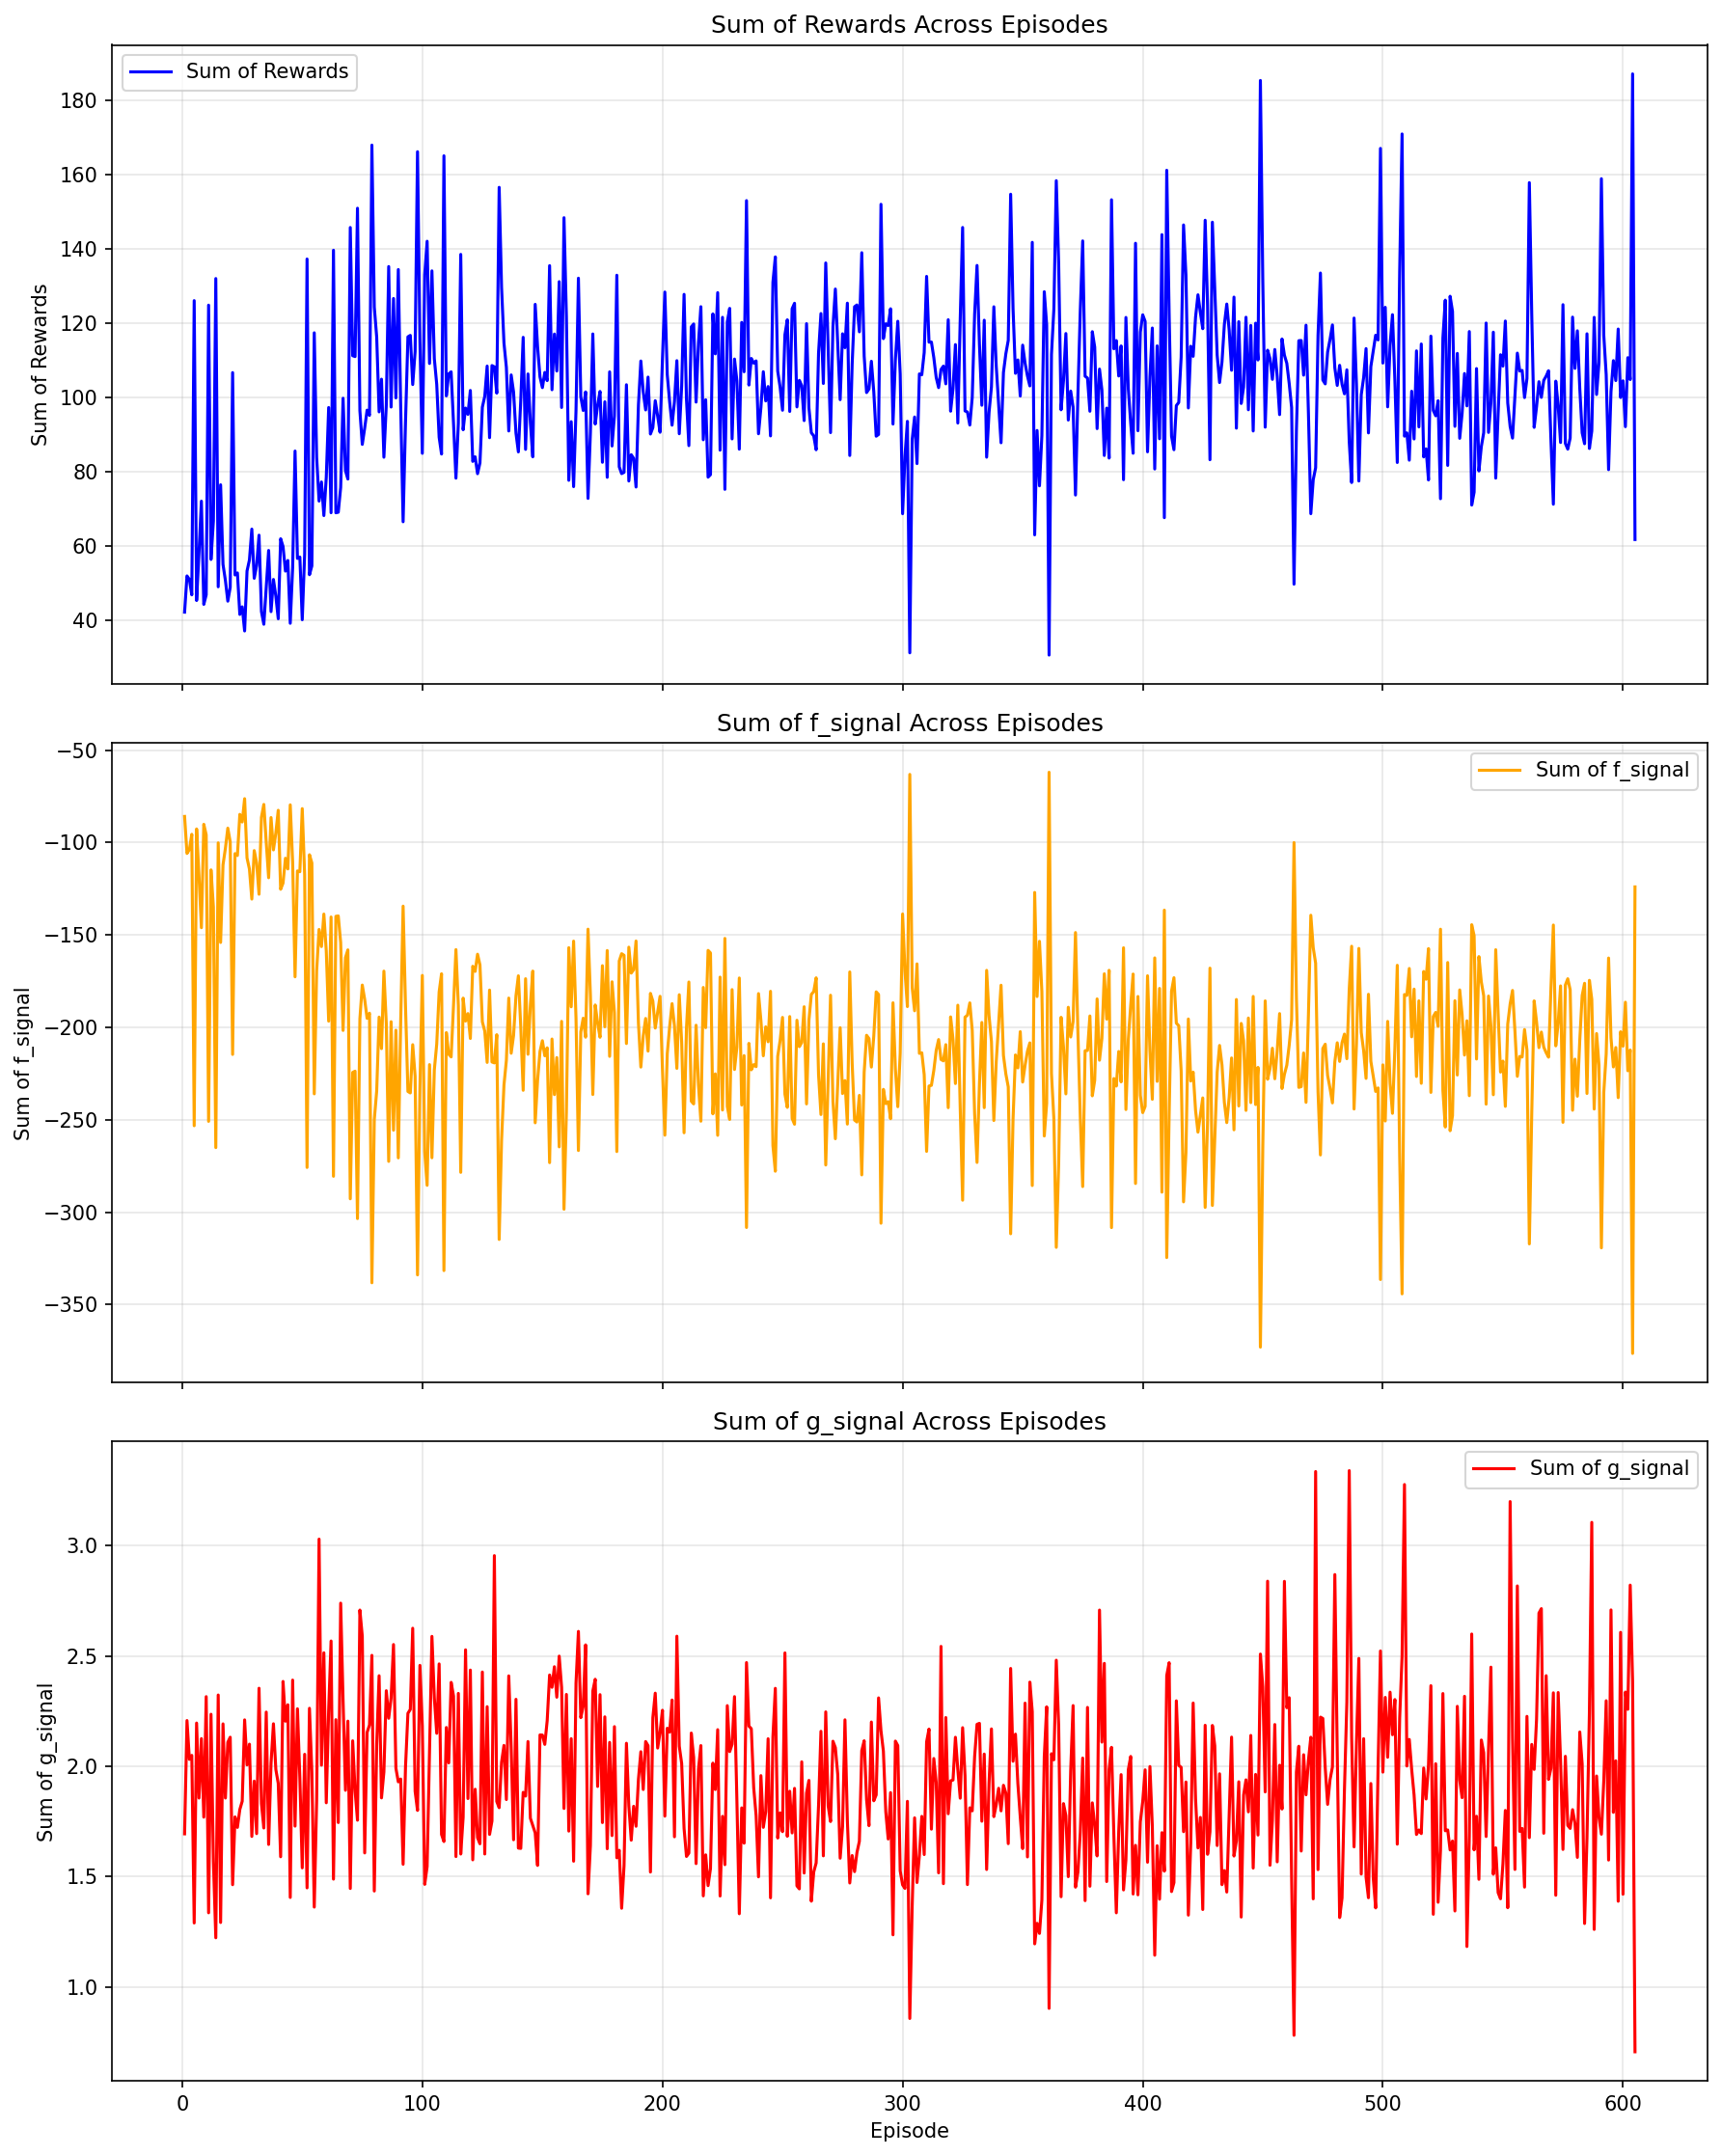

In [10]:
# we plot how the sum of f-signal and sum of g-signal changes over episodes
# we create three subplots, one for sum of rewards across episodes, one for sum of f-signal across episodes, and one for sum of g-signal across episodes

# Create a temporary dataframe with aggregated values per episode
episode_summary = episode_info_df.groupby('episode').agg({
    'reward': 'sum',
    'f_signal': 'sum', 
    'g_signal': 'sum'
}).reset_index()

# Create the three subplot figure
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12, 15), sharex=True, dpi=150)

# Plot sum of rewards across episodes
sns.lineplot(data=episode_summary, x="episode", y="reward", ax=ax1, label="Sum of Rewards", color="blue")
ax1.set_title("Sum of Rewards Across Episodes")
ax1.set_ylabel("Sum of Rewards")
ax1.legend()
ax1.grid(True, alpha=0.3)

# Plot sum of f_signal across episodes
sns.lineplot(data=episode_summary, x="episode", y="f_signal", ax=ax2, label="Sum of f_signal", color="orange")
ax2.set_title("Sum of f_signal Across Episodes")
ax2.set_ylabel("Sum of f_signal")
ax2.legend()
ax2.grid(True, alpha=0.3)

# Plot sum of g_signal across episodes
sns.lineplot(data=episode_summary, x="episode", y="g_signal", ax=ax3, label="Sum of g_signal", color="red")
ax3.set_title("Sum of g_signal Across Episodes")
ax3.set_ylabel("Sum of g_signal")
ax3.set_xlabel("Episode")
ax3.legend()
ax3.grid(True, alpha=0.3)

plt.tight_layout()

# Save the figure
signals_summary_path = expt_folder / "graphs" / "signals_summary.png"
if not signals_summary_path.parent.exists():
    signals_summary_path.parent.mkdir(parents=True)
fig.savefig(signals_summary_path, dpi=300, bbox_inches='tight')

plt.show()

In [11]:
episode_info_df

episode_index  current_step            datetime  battery_soc (%)  \
0                  96             0 2013-08-28 00:00:02         0.150000   
1                  96             1 2013-08-28 00:01:02         0.151042   
2                  96             2 2013-08-28 00:02:02         0.155464   
3                  96             3 2013-08-28 00:03:02         0.162653   
4                  96             4 2013-08-28 00:04:02         0.170987   
...               ...           ...                 ...              ...   
863532              7           453 2013-03-10 07:33:04         0.742692   
863533              7           454 2013-03-10 07:34:04         0.744528   
863534              7           455 2013-03-10 07:35:04         0.747589   
863535              7           456 2013-03-10 07:36:04         0.749347   
863536              7           456 2013-03-10 07:36:04         0.750710   

        battery_soc (kWh)  user_load (W)  grid_load (W)  action (kW)  \
0                1.200000     304.000000            NaN          NaN   
1                1.208340     301.620664     804.377238     0.500377   
2                1.243711     302.718374    2423.906984     2.122286   
3                1.301226     307.954288    3753.618213     3.450900   
4                1.367893     300.548825    4307.954288     4.000000   
...                   ...            ...            ...          ...   
863532           5.941539     166.868224    1187.708323     1.020777   
863533           5.956226     167.341185    1048.129215     0.881261   
863534           5.980714     167.131458    1636.587811     1.469247   
863535           5.994780     166.528055    1011.077915     0.843946   
863536           6.005683     166.528055    1011.077915     0.654220   

        battery_action (kW)    reward  f_signal  g_signal  \
0                       NaN       NaN       NaN       NaN   
1                  0.500377 -0.000239 -0.000364  0.000842   
2                  2.122286 -0.001717 -0.000138  0.003573   
3                  3.450900 -0.002885 -0.000039  0.005809   
4                  4.000000 -0.003357 -0.000019  0.006733   
...                     ...       ...       ...       ...   
863532             1.020777  0.172611 -0.348760  0.003539   
863533             0.881261  0.166425 -0.335906  0.003055   
863534             1.469247  0.144978 -0.295050  0.005093   
863535             0.843946  0.150396 -0.303718  0.002926   
863536             0.654220  0.181899 -0.366066  0.002268   

        f_signal-predicted_mean  f_signal-predicted_log_var  f_signal-target  \
0                           NaN                         NaN              NaN   
1                     -0.023197                         0.0        -0.050192   
2                     -0.030296                         0.0        -0.046925   
3                     -0.040169                         0.0        -0.031338   
4                     -0.047256                         0.0        -0.053383   
...                         ...                         ...              ...   
863532                 1.046525                         0.0        -0.604667   
863533                 1.124234                         0.0        -0.601505   
863534                 1.304329                         0.0        -0.602907   
863535                 1.265469                         0.0        -0.606942   
863536                 0.738088                         0.0        -0.606418   

       TimeLimit.truncated  episode  
0                      NaN        1  
1                    False        1  
2                    False        1  
3                    False        1  
4                    False        1  
...                    ...      ...  
863532               False      605  
863533               False      605  
863534               False      605  
863535               False      605  
863536                 NaN      605  

[863537 rows x 17 columns]

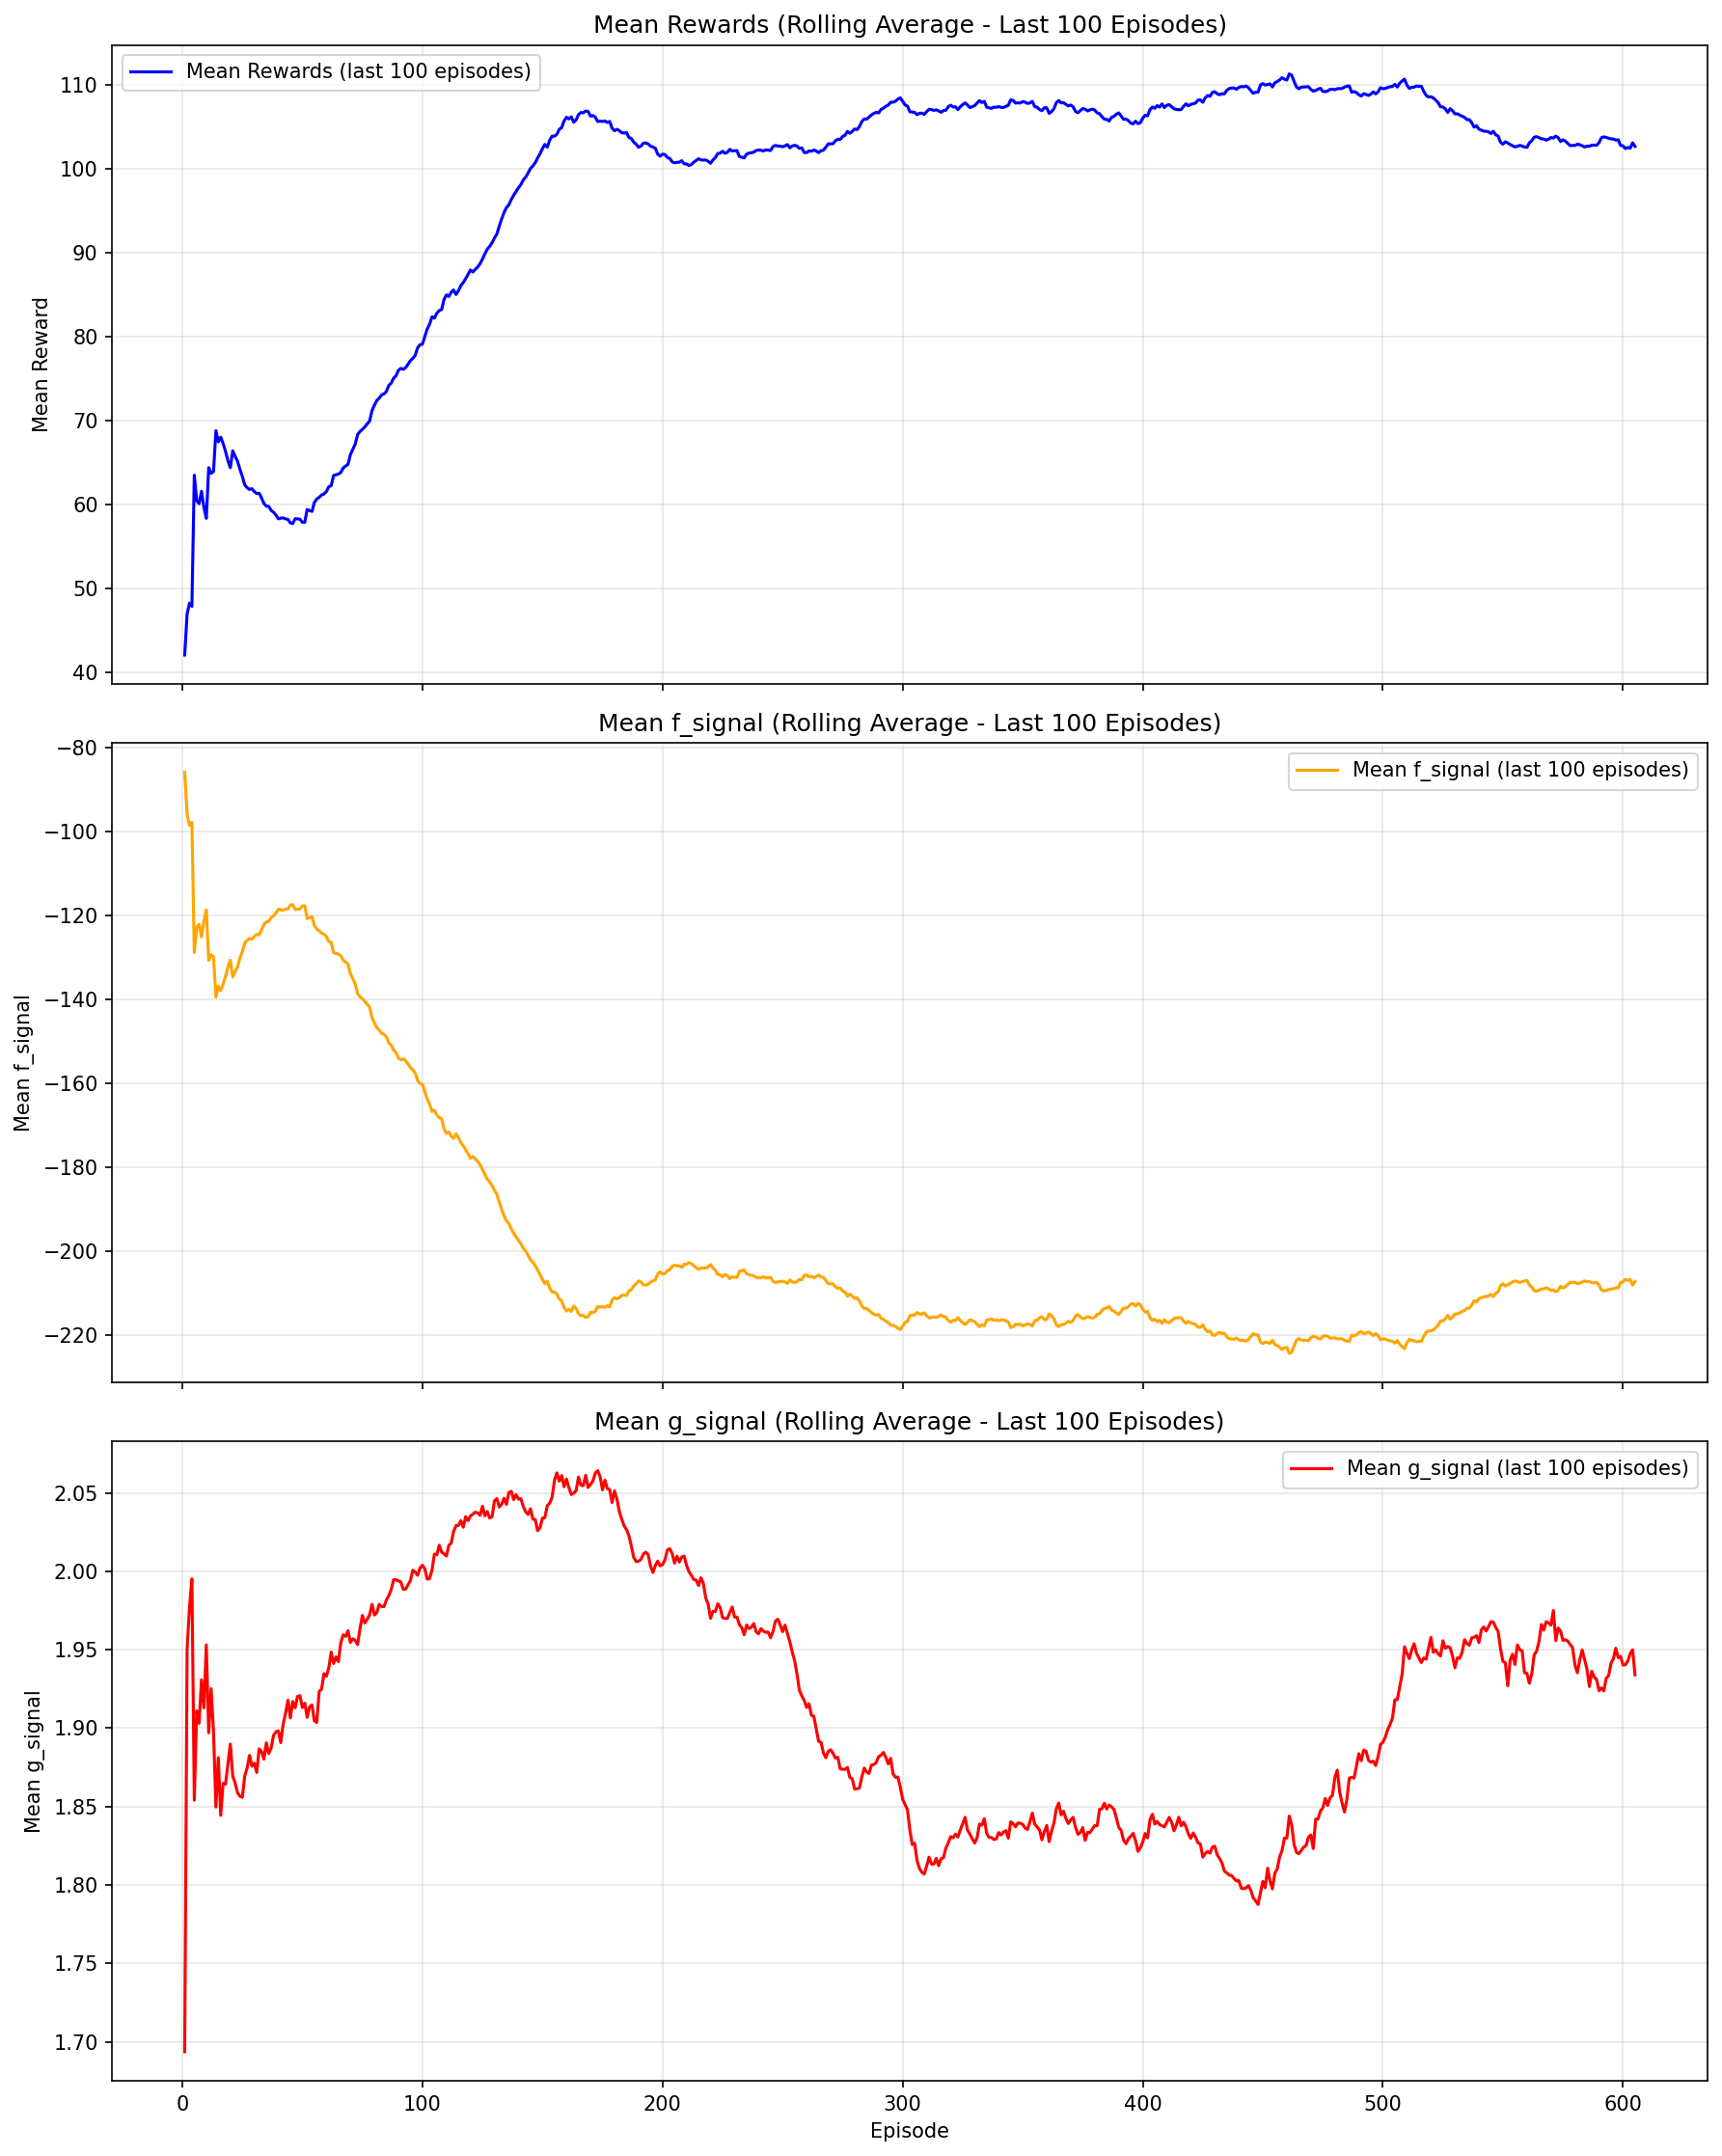

[2025-07-24 15:09:51:365] Rolling average window size: 100 episodes
[2025-07-24 15:09:51:365] Final rolling mean reward: 102.673
[2025-07-24 15:09:51:365] Final rolling mean f_signal: -207.281
[2025-07-24 15:09:51:365] Final rolling mean g_signal: 1.934


In [12]:
# Create SB3-style rolling average plot (ep_rew_mean equivalent)
# Calculate rolling average over last 100 episodes (similar to stable-baselines3 ep_rew_mean)

window_size = 100  # Default stats_window_size in stable-baselines3

# Create rolling averages for each metric
episode_summary_sb3 = episode_summary.copy()
episode_summary_sb3['reward_mean_100'] = episode_summary_sb3['reward'].rolling(window=window_size, min_periods=1).mean()
episode_summary_sb3['f_signal_mean_100'] = episode_summary_sb3['f_signal'].rolling(window=window_size, min_periods=1).mean()
episode_summary_sb3['g_signal_mean_100'] = episode_summary_sb3['g_signal'].rolling(window=window_size, min_periods=1).mean()

# Create the three subplot figure with SB3-style rolling averages
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12, 15), sharex=True, dpi=150)

# Plot rolling mean of rewards (equivalent to ep_rew_mean in SB3)
sns.lineplot(data=episode_summary_sb3, x="episode", y="reward_mean_100", ax=ax1, label=f"Mean Rewards (last {window_size} episodes)", color="blue")
ax1.set_title(f"Mean Rewards (Rolling Average - Last {window_size} Episodes)")
ax1.set_ylabel("Mean Reward")
ax1.legend()
ax1.grid(True, alpha=0.3)

# Plot rolling mean of f_signal
sns.lineplot(data=episode_summary_sb3, x="episode", y="f_signal_mean_100", ax=ax2, label=f"Mean f_signal (last {window_size} episodes)", color="orange")
ax2.set_title(f"Mean f_signal (Rolling Average - Last {window_size} Episodes)")
ax2.set_ylabel("Mean f_signal")
ax2.legend()
ax2.grid(True, alpha=0.3)

# Plot rolling mean of g_signal
sns.lineplot(data=episode_summary_sb3, x="episode", y="g_signal_mean_100", ax=ax3, label=f"Mean g_signal (last {window_size} episodes)", color="red")
ax3.set_title(f"Mean g_signal (Rolling Average - Last {window_size} Episodes)")
ax3.set_ylabel("Mean g_signal")
ax3.set_xlabel("Episode")
ax3.legend()
ax3.grid(True, alpha=0.3)

plt.tight_layout()

# Save the figure
sb3_style_path = expt_folder / "graphs" / "sb3_style_rolling_average.png"
if not sb3_style_path.parent.exists():
    sb3_style_path.parent.mkdir(parents=True)
fig.savefig(sb3_style_path, dpi=300, bbox_inches='tight')

plt.show()

# Display some statistics
print_log(f"Rolling average window size: {window_size} episodes")
print_log(f"Final rolling mean reward: {episode_summary_sb3['reward_mean_100'].iloc[-1]:.3f}")
print_log(f"Final rolling mean f_signal: {episode_summary_sb3['f_signal_mean_100'].iloc[-1]:.3f}")
print_log(f"Final rolling mean g_signal: {episode_summary_sb3['g_signal_mean_100'].iloc[-1]:.3f}")

---

A better visualization is plot the same data using the `episode_info_df`, especially the mean and sd reward per episode (as the df is in long form w.r.t. episode index), with the sd is plotted using errorbar

We also plot how the f_signal and g_signal changes over episodes

/tmp/ipykernel_701364/3444335868.py:25: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


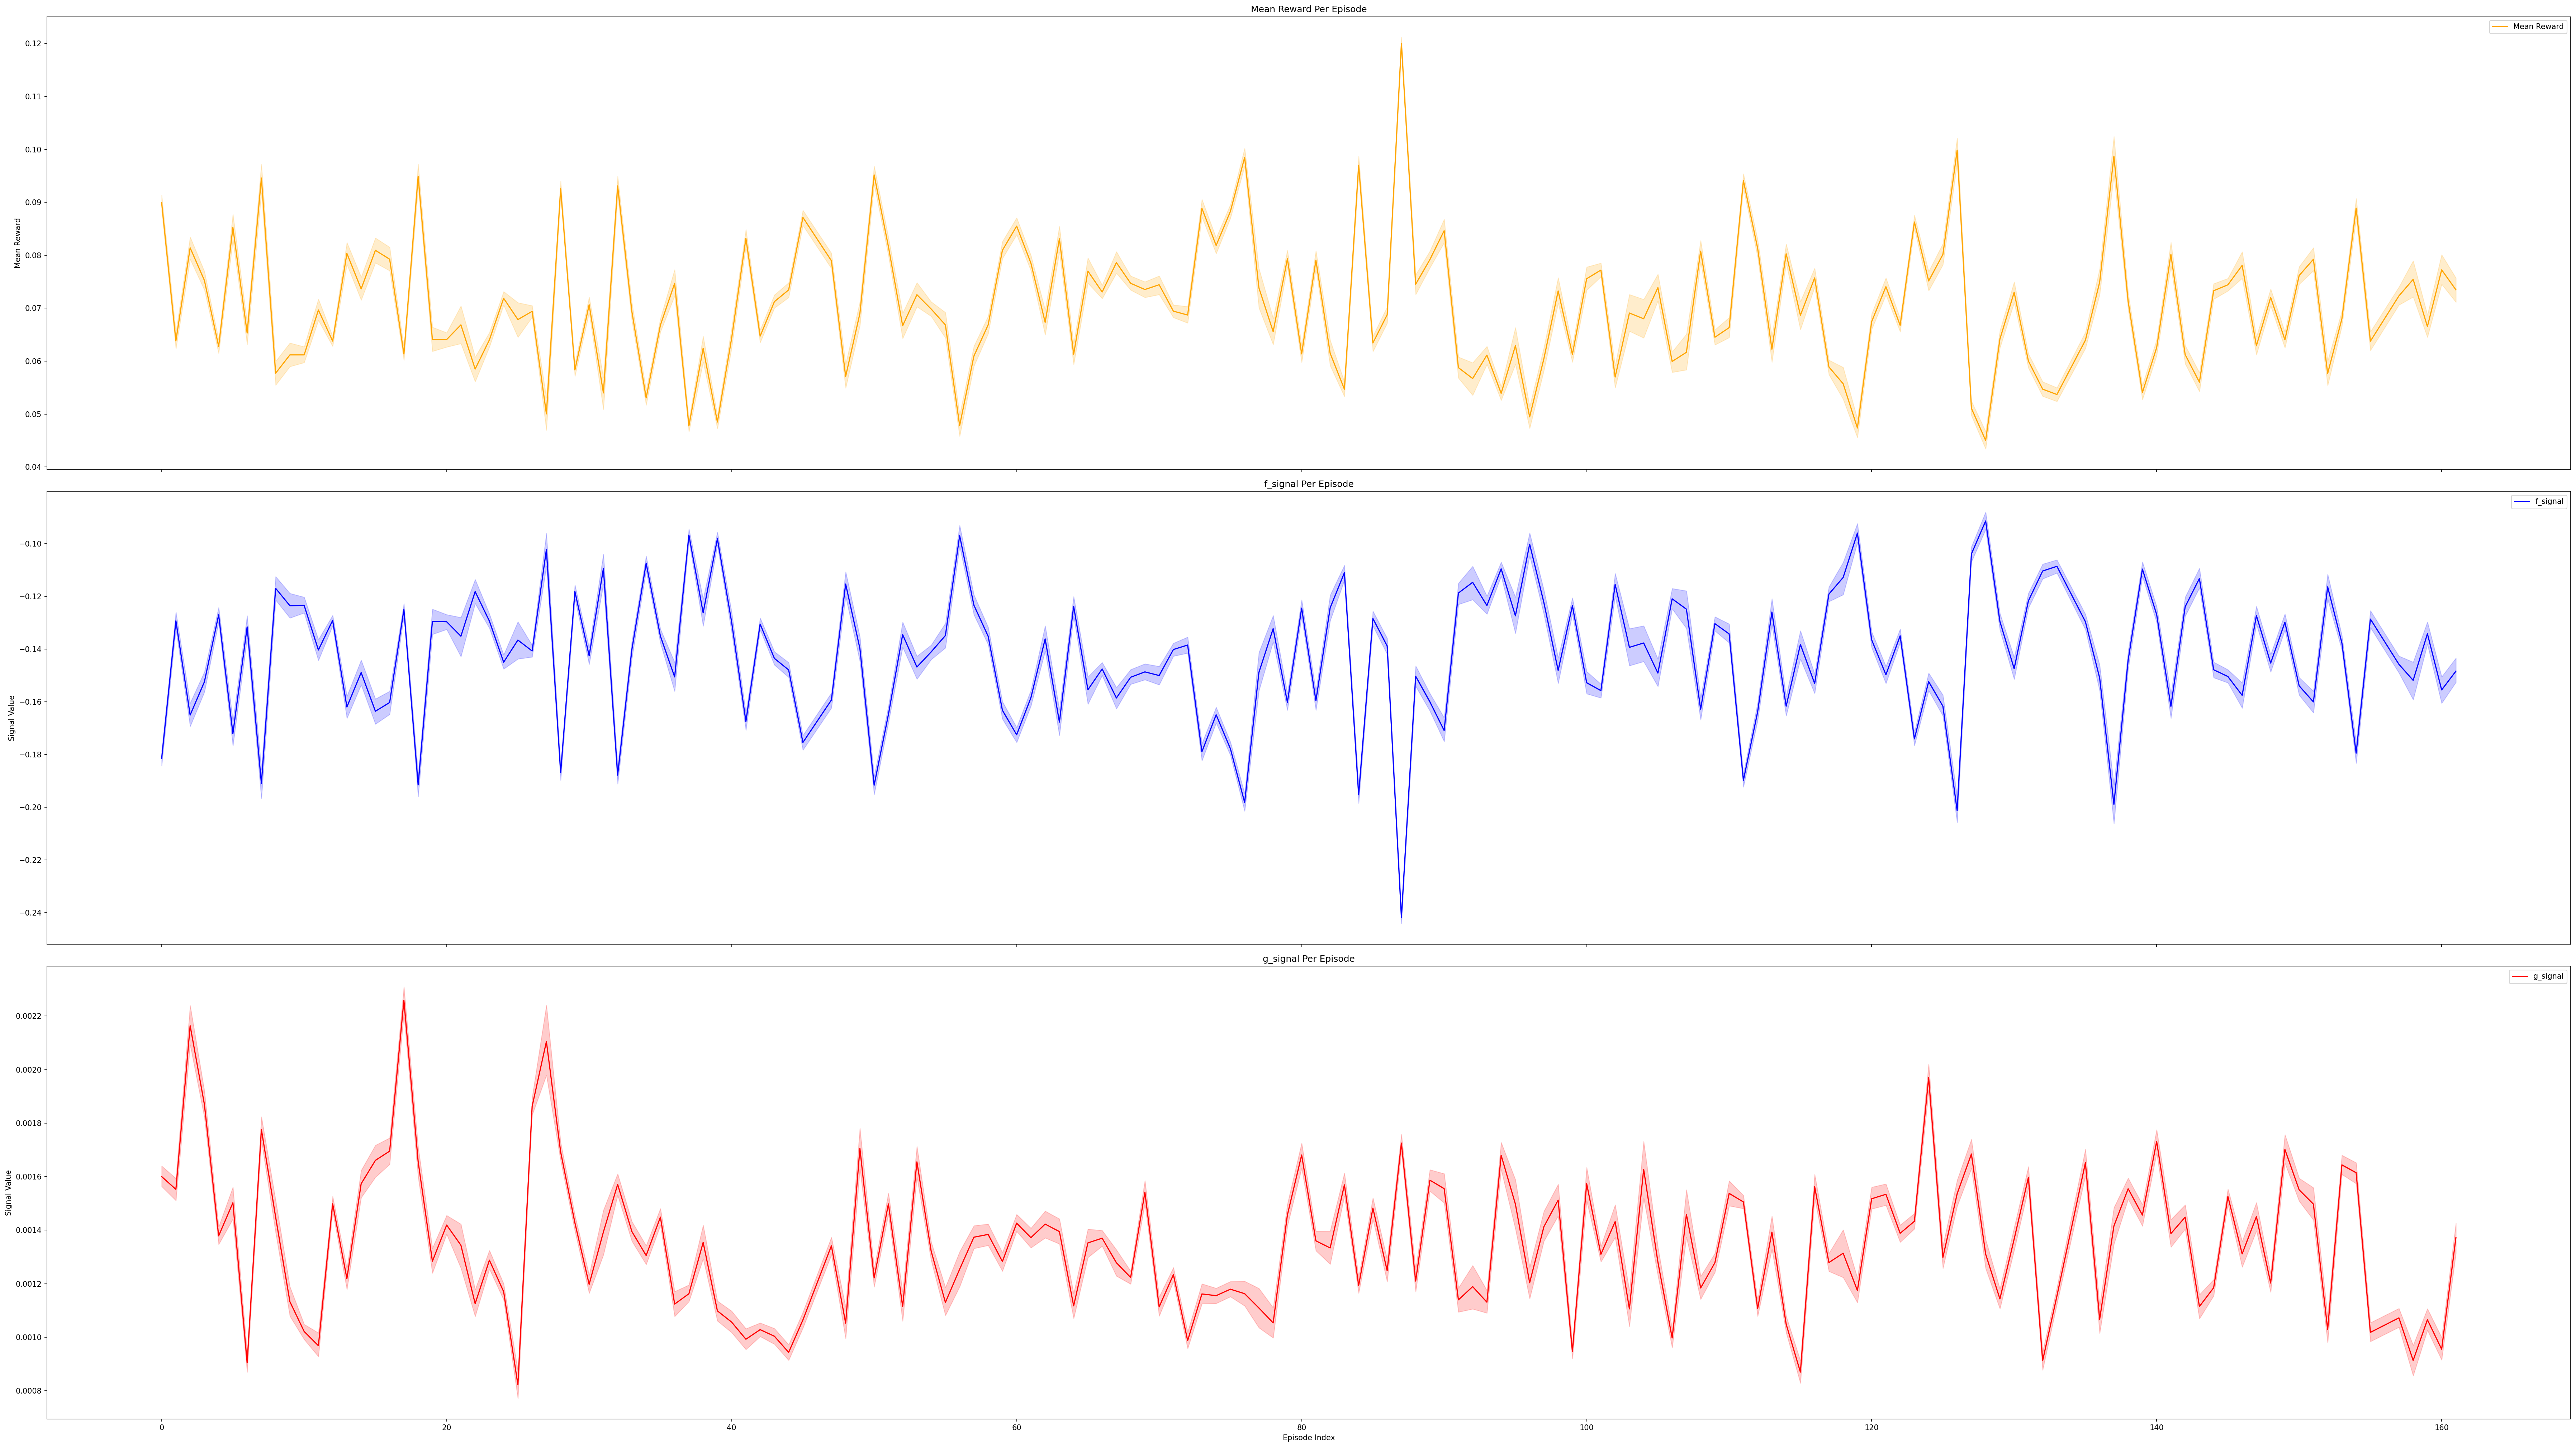

In [13]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(48,27), sharex=True, dpi=150)

# Plot the mean and std of per-step reward from episode_info_df
sns.lineplot(data=episode_info_df, x="episode_index", y="reward", ax=ax1, label="Mean Reward", color="orange")
ax1.set_title("Mean Reward Per Episode")
ax1.set_ylabel("Mean Reward")
ax1.legend()

# plot the mean & sd of f_signal and g_signal
sns.lineplot(data=episode_info_df, x="episode_index", y="f_signal", ax=ax2, label="f_signal", color="blue")
ax2.set_title("f_signal Per Episode")
ax2.set_ylabel("Signal Value")
ax2.legend()

sns.lineplot(data=episode_info_df, x="episode_index", y="g_signal", ax=ax3, label="g_signal", color="red")
ax3.set_title("g_signal Per Episode")
ax3.set_ylabel("Signal Value")
ax3.legend()


plt.xlabel("Episode Index")
plt.tight_layout()

fig.savefig(expt_folder / "graphs" / "episode_info_plot.png", dpi=300, bbox_inches='tight')
fig.show()

We can also plot how the training loss of the H-network varies across episodes

In [14]:
h_network_loss_df

NameError: name 'h_network_loss_df' is not defined

In [16]:
# add a column for the episode number, which is equal to (index + 1) * 5
# as the H-network is updated every 5 steps
h_network_loss_df['episode_index'] = (h_network_loss_df.index + 1) * 5

/tmp/ipykernel_2067408/1538420734.py:18: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


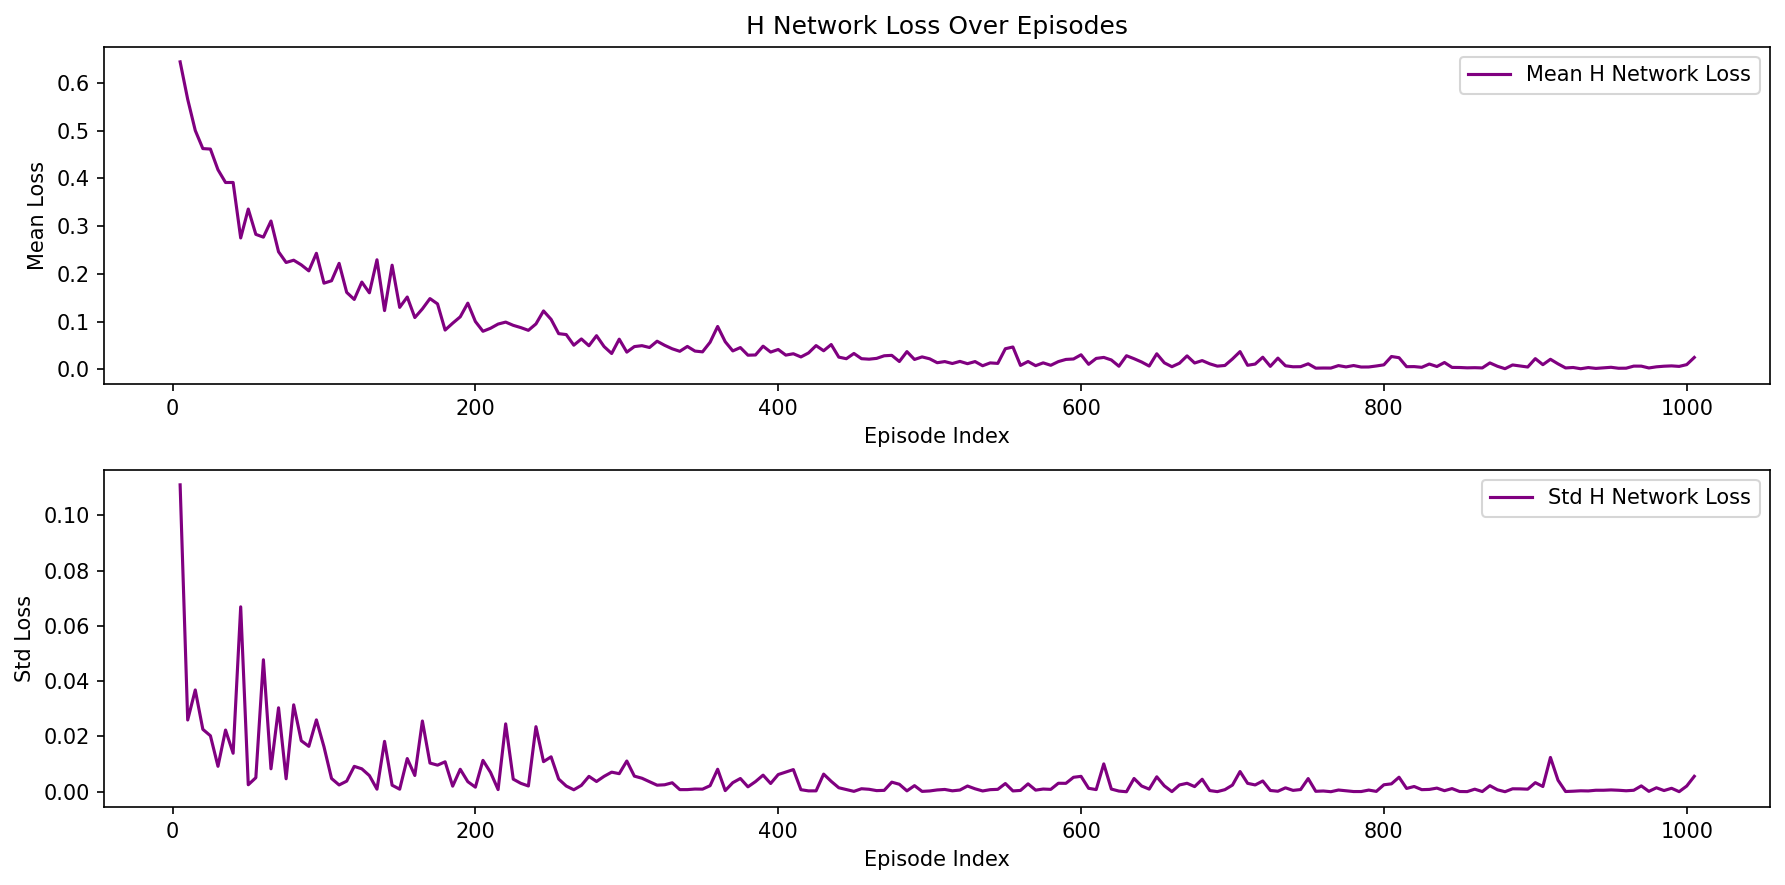

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the h_network_loss_df, both mean_loss and std_loss
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 6), dpi=150)
sns.lineplot(data=h_network_loss_df, x="episode_index", y="mean_loss", ax=ax1, label="Mean H Network Loss", color="purple")
sns.lineplot(data=h_network_loss_df, x="episode_index", y="std_loss", ax=ax2, label="Std H Network Loss", color="purple")
ax1.set_title("H Network Loss Over Episodes")
ax1.set_ylabel("Mean Loss")
ax1.set_xlabel("Episode Index")
ax2.set_ylabel("Std Loss")
ax2.set_xlabel("Episode Index")
ax1.legend()
ax2.legend()
plt.tight_layout()

fig.savefig(expt_folder / "graphs" / "h_network_loss_plot.png", dpi=300, bbox_inches='tight')
fig.show()


For each of the episode_info in episode_info_list, we first plot how the user load and grid load changes across time

It will be a graph with two subplot, with the first one ploting both user load and (masked) grid load, and the second one plotting the battery state-of-charge

For the second sub-plot, we have to calculate the colour of each point/line. The line will be green if the soc increases, and line wiil be red if the soc decreases, and blue if there's no change

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.collections import LineCollection
from matplotlib.colors import ListedColormap
from matplotlib.patches import Patch

# Plot individual episodes with user load, grid load, and battery SOC
def plot_episode_details(episode_df, episode_idx, save_path=None, use_datetime=False, show=True):
    """
    Plot episode details with user load, grid load, and battery SOC (updated with datetime option)
    
    Args:
        episode_df: DataFrame containing episode information
        episode_idx: Episode index for title
        save_path: Optional path to save the figure
        use_datetime: If True, use datetime as x-axis; if False, use step numbers
        show: If True, display the plot; if False, suppress display
    """
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(20, 10), sharex=True, dpi=150)
    
    # Determine x-axis values
    if use_datetime and 'datetime' in episode_df.columns:
        x_values = episode_df['datetime']
        x_label = 'Time'
    else:
        x_values = range(len(episode_df))
        x_label = 'Time Steps'

    episode_ittr = episode_df['episode'].iloc[0]  # Get the episode iteration number for title
    
    # First subplot: User load and Grid load
    ax1.plot(x_values, episode_df['user_load (W)'], label='User Load', color='blue', linewidth=2)
    ax1.plot(x_values, episode_df['grid_load (W)'], label='Grid Load (Masked)', color='pink', linewidth=2, alpha=0.8)

    ax1.set_title(f'Episode {episode_idx} @ ittr {episode_ittr}: Load Profiles Over Time')
    ax1.set_ylabel('Power (W)')
    ax1.legend(bbox_to_anchor=(1.02, 1), loc='upper left')
    ax1.grid(True, alpha=0.3)
    
    # Second subplot: Battery SOC with color coding using LineCollection
    soc_values = episode_df['battery_soc (kWh)'].values
    
    # Calculate SOC changes
    soc_changes = np.diff(soc_values)
    
    # Create numerical color array based on SOC changes for smooth coloring
    # -1: red (decreasing), 0: blue (no change), 1: green (increasing)
    color_values = []
    for change in soc_changes:
        if change > 1e-6:  # Small threshold to handle floating point precision
            color_values.append(1)    # SOC increases (green)
        elif change < -1e-6:
            color_values.append(-1)   # SOC decreases (red)
        else:
            color_values.append(0)    # No change (blue)
    
    # Create line segments for LineCollection
    if use_datetime and 'datetime' in episode_df.columns:
        # Convert datetime to matplotlib date numbers for LineCollection
        from matplotlib.dates import date2num
        x_numeric = date2num(episode_df['datetime'])
    else:
        x_numeric = np.array(range(len(episode_df)))
    
    points = np.array([x_numeric, soc_values]).T.reshape(-1, 1, 2)
    segments = np.concatenate([points[:-1], points[1:]], axis=1)
    
    # Create LineCollection with custom colormap
    lc = LineCollection(segments, linewidth=3, capstyle='round')
    lc.set_array(np.array(color_values))
    
    # Create custom colormap: red (-1) -> blue (0) -> green (1)
    colors_map = ['red', 'blue', 'green']
    cmap = ListedColormap(colors_map, name='soc_change', N=3)
    
    lc.set_cmap(cmap)
    lc.set_clim(-1, 1)
    
    # Add the line collection to the plot
    line = ax2.add_collection(lc)

    ax2.set_title(f'Episode {episode_idx} @ ittr {episode_ittr}: Battery State of Charge Over Time')
    ax2.set_xlabel(x_label)
    ax2.set_ylabel('SOC (kWh)')
    ax2.grid(True, alpha=0.3)
    
    # Set axis limits for better visualization
    if use_datetime and 'datetime' in episode_df.columns:
        ax2.set_xlim(episode_df['datetime'].iloc[0], episode_df['datetime'].iloc[-1])
    else:
        ax2.set_xlim(0, len(episode_df)-1)
    ax2.set_ylim(soc_values.min() * 0.95, soc_values.max() * 1.05)
    
    # Add legend for SOC colors
    legend_elements = [Patch(facecolor='green', label='SOC Increasing'),
                      Patch(facecolor='red', label='SOC Decreasing'),
                      Patch(facecolor='blue', label='SOC No Change')]
    ax2.legend(handles=legend_elements, bbox_to_anchor=(1.02, 1), loc='upper left')
    
    # Format datetime axis if using datetime
    if use_datetime and 'datetime' in episode_df.columns:
        from matplotlib.dates import DateFormatter
        # Format the datetime axis
        formatter = DateFormatter('%H:%M:%S')
        for ax in [ax1, ax2]:
            ax.xaxis.set_major_formatter(formatter)
        plt.xticks(rotation=45)
    
    plt.tight_layout()
    
    if save_path:
        fig.savefig(save_path, dpi=300, bbox_inches='tight')

    if show:
        plt.show()
    return fig

# Plot details for selected episodes (first 5 episodes as example)
# You can modify the range to plot more or specific episodes
# episodes_to_plot = range(min(1, len(episode_info_dfs)))  # Plot first 5 episodes or all if less than 5
episodes_to_plot = [500]  # Plot first 5 episodes or all if less than 5

for i in episodes_to_plot:
    episode_df = episode_info_dfs[i]
    episode_idx = episode_df['episode_index'].iloc[0]  # Get the actual episode index
    
    print_log(f"Plotting episode {episode_idx} @ ittr {i} details...")
    
    # Create save path for individual episode plots
    save_path = expt_folder / "graphs" / "per_episode" /f"episode_{episode_idx}_details.png"

    fig = plot_episode_details(episode_df, episode_idx, save_path=None, use_datetime=True, show=True)

    # Close the figure to free memory
    # plt.close(fig)

[2025-07-24 15:12:00:073] Plotting episode 150 @ ittr 500 details...


/tmp/ipykernel_702002/2113605644.py:116: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  plt.show()


In [10]:
episode_df

episode_index  current_step            datetime  battery_soc (%)  \
0               150             0 2013-12-03 00:00:02         0.150000   
1               150             1 2013-12-03 00:01:02         0.153856   
2               150             2 2013-12-03 00:02:02         0.158935   
3               150             3 2013-12-03 00:03:02         0.162571   
4               150             4 2013-12-03 00:04:02         0.166850   
...             ...           ...                 ...              ...   
1435            150          1435 2013-12-03 23:55:02         0.924362   
1436            150          1436 2013-12-03 23:56:02         0.928192   
1437            150          1437 2013-12-03 23:57:02         0.931780   
1438            150          1438 2013-12-03 23:58:02         0.934425   
1439            150          1438 2013-12-03 23:58:02         0.938613   

      battery_soc (kWh)  user_load (W)  grid_load (W)  action (kW)  \
0              1.200000     300.000000            NaN          NaN   
1              1.230849     300.784320    2150.958586     1.850959   
2              1.271478     300.177455    2738.491267     2.437707   
3              1.300570     300.688967    2045.685411     1.745508   
4              1.334801     301.756905    2354.576811     2.053888   
...                 ...            ...            ...          ...   
1435           7.394898     333.424103    2068.277029     1.733581   
1436           7.425537     333.093581    2171.737205     1.838313   
1437           7.454241     332.310867    2055.350957     1.722257   
1438           7.475397     334.235391    1601.666879     1.269356   
1439           7.508903     334.235391    1601.666879     2.010352   

      battery_action (kW)    reward  f_signal  g_signal  \
0                     NaN       NaN       NaN       NaN   
1                1.850959  0.152814 -0.308743  0.003116   
2                2.437707  0.130411 -0.264925  0.004103   
3                1.745508  0.172673 -0.348284  0.002938   
4                2.053888  0.180598 -0.364654  0.003457   
...                   ...       ...       ...       ...   
1435             1.733581  0.146474 -0.295866  0.002918   
1436             1.838313  0.152264 -0.307622  0.003094   
1437             1.722257  0.144703 -0.292305  0.002899   
1438             1.269356  0.108269 -0.218675  0.002137   
1439             2.010352  0.168746 -0.340877  0.003384   

      f_signal-predicted_mean  f_signal-predicted_log_var  f_signal-target  \
0                         NaN                         NaN              NaN   
1                    1.483477                         0.0        -0.368107   
2                    1.651539                         0.0        -0.369583   
3                    0.818732                         0.0        -0.368339   
4                    1.143323                         0.0        -0.365742   
...                       ...                         ...              ...   
1435                 0.687423                         0.0        -0.288737   
1436                 0.725038                         0.0        -0.289541   
1437                 0.673608                         0.0        -0.291444   
1438                 0.478968                         0.0        -0.286764   
1439                 0.867281                         0.0        -0.280420   

     TimeLimit.truncated  episode  
0                    NaN      501  
1                  False      501  
2                  False      501  
3                  False      501  
4                  False      501  
...                  ...      ...  
1435               False      501  
1436               False      501  
1437               False      501  
1438               False      501  
1439                 NaN      501  

[1440 rows x 17 columns]

In [11]:
# Plot individual episodes with three separate subplots
def plot_episode_details_three_subplots(episode_df, episode_idx, save_path=None, use_datetime=False, show=True):
    """
    Plot episode details with three separate subplots: user load, grid load, and battery SOC
    
    Args:
        episode_df: DataFrame containing episode information
        episode_idx: Episode index for title
        save_path: Optional path to save the figure
        use_datetime: If True, use datetime as x-axis; if False, use step numbers
        show: If True, display the plot; if False, suppress display
    """
    fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(20, 15), sharex=True, dpi=150)
    
    # Determine x-axis values
    if use_datetime and 'datetime' in episode_df.columns:
        x_values = episode_df['datetime']
        x_label = 'Time'
    else:
        x_values = range(len(episode_df))
        x_label = 'Time Steps'

    episode_ittr = episode_df['episode'].iloc[0]  # Get the episode iteration number for title
    
    # First subplot: User load only
    ax1.plot(x_values, episode_df['user_load (W)'], label='User Load', color='blue', linewidth=2)
    ax1.set_title(f'Episode {episode_idx} @ ittr {episode_ittr}: User Load Over Time')
    ax1.set_ylabel('Power (W)')
    ax1.legend(bbox_to_anchor=(1.02, 1), loc='upper left')
    ax1.grid(True, alpha=0.3)
    
    # Second subplot: Grid load only  
    ax2.plot(x_values, episode_df['grid_load (W)'], label='Grid Load (Masked)', color='orange', linewidth=2, alpha=0.8)
    ax2.set_title(f'Episode {episode_idx} @ ittr {episode_ittr}: Grid Load (Masked) Over Time')
    ax2.set_ylabel('Power (W)')
    ax2.legend(bbox_to_anchor=(1.02, 1), loc='upper left')
    ax2.grid(True, alpha=0.3)
    
    # Third subplot: Battery SOC with color coding using LineCollection
    soc_values = episode_df['battery_soc (kWh)'].values
    
    # Calculate SOC changes
    soc_changes = np.diff(soc_values)
    
    # Create numerical color array based on SOC changes for smooth coloring
    # -1: red (decreasing), 0: blue (no change), 1: green (increasing)
    color_values = []
    for change in soc_changes:
        if change > 1e-6:  # Small threshold to handle floating point precision
            color_values.append(1)    # SOC increases (green)
        elif change < -1e-6:
            color_values.append(-1)   # SOC decreases (red)
        else:
            color_values.append(0)    # No change (blue)
    
    # Create line segments for LineCollection
    if use_datetime and 'datetime' in episode_df.columns:
        # Convert datetime to matplotlib date numbers for LineCollection
        from matplotlib.dates import date2num
        x_numeric = date2num(episode_df['datetime'])
    else:
        x_numeric = np.array(range(len(episode_df)))
    
    points = np.array([x_numeric, soc_values]).T.reshape(-1, 1, 2)
    segments = np.concatenate([points[:-1], points[1:]], axis=1)
    
    # Create LineCollection with custom colormap
    lc = LineCollection(segments, linewidth=3, capstyle='round')
    lc.set_array(np.array(color_values))
    
    # Create custom colormap: red (-1) -> blue (0) -> green (1)
    colors_map = ['red', 'blue', 'green']
    cmap = ListedColormap(colors_map, name='soc_change', N=3)
    
    lc.set_cmap(cmap)
    lc.set_clim(-1, 1)
    
    # Add the line collection to the plot
    line = ax3.add_collection(lc)

    ax3.set_title(f'Episode {episode_idx} @ ittr {episode_ittr}: Battery State of Charge Over Time')
    ax3.set_xlabel(x_label)
    ax3.set_ylabel('SOC (kWh)')
    ax3.grid(True, alpha=0.3)
    
    # Set axis limits for better visualization
    if use_datetime and 'datetime' in episode_df.columns:
        ax3.set_xlim(episode_df['datetime'].iloc[0], episode_df['datetime'].iloc[-1])
    else:
        ax3.set_xlim(0, len(episode_df)-1)
    ax3.set_ylim(soc_values.min() * 0.95, soc_values.max() * 1.05)
    
    # Add legend for SOC colors
    legend_elements = [Patch(facecolor='green', label='SOC Increasing'),
                      Patch(facecolor='red', label='SOC Decreasing'),
                      Patch(facecolor='blue', label='SOC No Change')]
    ax3.legend(handles=legend_elements, bbox_to_anchor=(1.02, 1), loc='upper left')
    
    # Format datetime axis if using datetime
    if use_datetime and 'datetime' in episode_df.columns:
        from matplotlib.dates import DateFormatter
        # Format the datetime axis
        formatter = DateFormatter('%H:%M:%S')
        for ax in [ax1, ax2, ax3]:
            ax.xaxis.set_major_formatter(formatter)
        plt.xticks(rotation=45)
    
    plt.tight_layout()
    
    if save_path:
        fig.savefig(save_path, dpi=300, bbox_inches='tight')

    if show:
        plt.show()
    return fig

In [12]:
# Example 2: Three subplots with datetime
# print_log("Creating three-subplot version with datetime...")
# save_path_3sub_datetime = expt_folder / "graphs" / "per_episode" / f"episode_{episode_idx}_three_subplots_datetime.png"
# fig2 = plot_episode_details_three_subplots(episode_df, episode_idx, save_path=save_path_3sub_datetime, use_datetime=True)
# plt.close(fig2)

In [16]:
# for each episode, plot the details with three subplots with datetime enabled
# then save the figure in the per_episode folder
for i in range(0, len(episode_info_dfs)):
    episode_df = episode_info_dfs[i]
    episode_idx = episode_df['episode_index'].iloc[0]  # Get the actual episode index
    
    # Create save path for individual episode plots
    save_path = expt_folder / "graphs" / "per_episode" / f"episode_{i+1:0>4d}_three_subplots.png"

    if not save_path.parent.exists():
        save_path.parent.mkdir(parents=True)

    fig = plot_episode_details_three_subplots(episode_df, episode_idx, save_path=save_path, use_datetime=True, show=False)

    print_log(f"Saved episode {episode_idx} details to {save_path}")

    # Close the figure to free memory
    plt.close('all')

Another way to perform that is we create a dictionary with key = episode_index

Then we put the episode_idx to each value of the dictionary

In [17]:
grouped_episode_idx = {}

for i, episode_df in enumerate(episode_info_dfs):
    episode_idx = episode_df['episode_index'].iloc[0]  # Get the actual episode index
    if episode_idx not in grouped_episode_idx:
        grouped_episode_idx[episode_idx] = []
    grouped_episode_idx[episode_idx].append(i)  # Store the index of the episode_df w.r.t. episode_info_dfs

grouped_episode_idx

{96: [0, 348],
 8: [1, 272],
 147: [2, 148, 464],
 35: [3, 63, 265, 361, 390, 466, 488],
 41: [4, 54, 101, 258],
 29: [5, 47, 195, 257, 284, 287, 569],
 54: [6, 118, 177, 268, 421, 494],
 28: [7, 87, 164, 234, 344, 409],
 56: [8, 301],
 131: [9, 117, 138, 179, 336],
 73: [10, 72, 232, 398, 525],
 149: [11, 86, 315, 381],
 72: [12, 244, 256, 388, 424],
 44: [13, 255, 520, 551, 599],
 127: [14, 289, 383, 536],
 132: [15, 182, 218, 404],
 139: [16, 203, 288, 385, 469],
 144: [17, 280, 515, 535, 542],
 4: [18, 197, 202, 328, 441, 483],
 83: [19, 37, 58, 310, 420],
 43: [20, 115, 397, 406, 411, 522, 571],
 39: [21, 22, 40, 223, 365],
 133: [23, 176, 380, 438, 505, 546],
 128: [24, 38, 366],
 34: [25, 36, 389, 453, 514],
 66: [26, 70, 143, 264, 342, 439, 442],
 120: [27, 153, 184, 444, 474],
 24: [28, 191, 217, 247, 487, 527],
 102: [29, 454],
 71: [30, 90, 116, 379, 435, 538, 579, 589],
 150: [31, 211, 309, 500],
 119: [32, 219, 427],
 37: [33, 39, 185, 225, 263, 401, 523, 537],
 135: [34, 

---

In [18]:
# Create a summary grid plot showing multiple episodes
def plot_episodes_grid(episode_dfs_list, episode_indices=None, save_path=None, show=True):
    """
    Create a grid plot showing multiple episodes in subplots
    
    Args:
        episode_dfs_list: List of episode DataFrames
        episode_indices: List of episode indices to plot (e.g., [0, 5, 10, 15]). 
                        If None, plots first 9 episodes.
        save_path: Optional path to save the figure
    """
    # Determine which episodes to plot
    if episode_indices is None:
        n_episodes = min(len(episode_dfs_list), 9)
        episodes_to_plot = list(range(n_episodes))
    else:
        episodes_to_plot = [idx for idx in episode_indices if idx < len(episode_dfs_list)]
        n_episodes = len(episodes_to_plot)
    
    if n_episodes == 0:
        print("No valid episodes to plot.")
        return None
    
    # Compute optimal grid layout
    def compute_optimal_layout(n):
        """Compute optimal number of rows and columns for n subplots"""
        if n <= 0:
            return 1, 1
        elif n == 1:
            return 1, 1
        elif n == 2:
            return 1, 2
        elif n == 3:
            return 1, 3
        elif n == 4:
            return 2, 2
        elif n <= 6:
            return 2, 3
        elif n <= 8:
            return 2, 4
        elif n <= 10:
            return 2, 5
        else:
            # For larger numbers, try to keep aspect ratio reasonable
            cols = int(np.ceil(np.sqrt(n)))
            rows = int(np.ceil(n / cols))
            return rows, cols
    
    n_rows, n_cols = compute_optimal_layout(n_episodes)
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(8 * n_cols, 6*n_rows), dpi=150)
    
    # Handle single subplot case
    if n_rows == 1 and n_cols == 1:
        axes = np.array([[axes]])
    elif n_rows == 1:
        axes = axes.reshape(1, -1)
    elif n_cols == 1:
        axes = axes.reshape(-1, 1)
    
    for i in range(n_episodes):
        row = i // n_cols
        col = i % n_cols
        ax = axes[row, col] if n_rows > 1 or n_cols > 1 else axes[0, 0]
        
        # Get the episode index and corresponding dataframe
        episode_idx_in_list = episodes_to_plot[i]
        episode_df = episode_dfs_list[episode_idx_in_list]
        episode_idx = episode_df['episode_index'].iloc[0]
        episode_ittr = episode_df['episode'].iloc[0]
        time_steps = range(len(episode_df))
        
        # Plot user load and grid load
        ax.plot(time_steps, episode_df['user_load (W)'], label='User Load', color='blue', alpha=0.7)
        ax.plot(time_steps, episode_df['grid_load (W)'], label='Grid Load', color='pink', alpha=0.7)
        
        # Plot SOC on secondary y-axis with LineCollection
        ax2 = ax.twinx()
        soc_values = episode_df['battery_soc (kWh)'].values
        soc_changes = np.diff(soc_values)
        
        # Create numerical color array based on SOC changes
        color_values = []
        for change in soc_changes:
            if change > 1e-6:
                color_values.append(1)    # SOC increases (green)
            elif change < -1e-6:
                color_values.append(-1)   # SOC decreases (red)  
            else:
                color_values.append(0)    # No change (blue)
        
        # Create line segments for LineCollection
        from matplotlib.collections import LineCollection
        points = np.array([time_steps, soc_values]).T.reshape(-1, 1, 2)
        segments = np.concatenate([points[:-1], points[1:]], axis=1)
        
        # Create LineCollection with custom colormap
        lc = LineCollection(segments, linewidth=2, capstyle='round')
        lc.set_array(np.array(color_values))
        
        # Create custom colormap: red (-1) -> blue (0) -> green (1)
        from matplotlib.colors import ListedColormap
        colors_map = ['red', 'blue', 'green']
        cmap = ListedColormap(colors_map, name='soc_change', N=3)
        
        lc.set_cmap(cmap)
        lc.set_clim(-1, 1)
        
        # Add the line collection to the plot
        line = ax2.add_collection(lc)

        ax.set_title(f'Episode {episode_idx} @ ittr {episode_ittr}', fontsize=10)
        ax.set_xlabel('Time Steps', fontsize=8)
        ax.set_ylabel('Power (W)', fontsize=8)
        ax2.set_ylabel('SOC (%)', fontsize=8)
        
        # Set axis limits for better visualization
        ax2.set_xlim(0, len(time_steps)-1)
        ax2.set_ylim(soc_values.min() * 0.95, soc_values.max() * 1.05)
        
        if i == 0:  # Add legend only to first subplot
            ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=8)
            # Add SOC legend
            legend_elements = [Patch(facecolor='green', label='SOC ↑'),
                             Patch(facecolor='red', label='SOC ↓'),
                             Patch(facecolor='blue', label='SOC →')]
            ax2.legend(handles=legend_elements, bbox_to_anchor=(1.05, 0.8), loc='upper left', fontsize=8)
        
        ax.grid(True, alpha=0.3)
    
    # Hide empty subplots
    for i in range(n_episodes, n_rows * n_cols):
        row = i // n_cols
        col = i % n_cols
        if n_rows > 1 or n_cols > 1:
            ax = axes[row, col]
        else:
            continue  # No empty plots for single subplot
        ax.set_visible(False)
    
    plt.tight_layout()
    
    if save_path:
        fig.savefig(save_path, dpi=300, bbox_inches='tight')
    
    if show:
        plt.show()
    return fig

# Create grid summary plot
print_log("Creating episodes grid summary plot...")

# Example 1: Plot first 9 episodes (default behavior)
# fig_grid = plot_episodes_grid(episode_info_dfs, save_path=grid_save_path)

# Example 2: Plot specific episodes with step=5 (episodes 100, 105, 110, 115, ...)
episode_indices = [i for i in range(0, min(50, len(episode_info_dfs)), 5)]  # [0, 5, 10, 15, ..., 45]
print_log(f"Plotting episodes: {episode_indices}")

grid_save_path = expt_folder / "graphs" / f"episodes_grid_summary_[{episode_indices[0]}_{episode_indices[-1]}].png"
fig_grid = plot_episodes_grid(episode_info_dfs, episode_indices=episode_indices, save_path=None)
plt.close('all')

[2025-07-24 15:37:13:676] Creating episodes grid summary plot...
[2025-07-24 15:37:13:677] Plotting episodes: [0, 5, 10, 15, 20, 25, 30, 35, 40, 45]


/tmp/ipykernel_702002/1300202799.py:147: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  plt.show()


In [19]:
# Create multiple grid summary plots for different episode ranges
# Each plot will show 10 episodes with step=5

total_episodes = len(episode_info_dfs)
episodes_per_plot = 10  # Number of episodes per grid plot
step_size = 5           # Step between episodes

# Calculate how many plots we need based on episodes_per_plot * step_size chunks
chunk_size = episodes_per_plot * step_size  # 50 episodes per chunk

print_log(f"Total episodes available: {total_episodes}")
print_log(f"Creating grid plots for every {episodes_per_plot} episodes (step={step_size})")

for start_idx in range(0, total_episodes, chunk_size):
    # Create episode indices for this chunk: [start_idx, start_idx+5, start_idx+10, ..., start_idx+45]
    episode_indices = [i for i in range(start_idx, min(start_idx + chunk_size, total_episodes), step_size)]
    
    # Only create plot if we have at least a few episodes
    if len(episode_indices) >= 2:
        print_log(f"Creating grid plot for episodes: {episode_indices}")
        
        # Create filename with episode range
        grid_save_path = expt_folder / "graphs" / f"episodes_grid_summary_[{episode_indices[0]:04d}_{episode_indices[-1]:04d}].png"

        # Create and save the plot
        fig_grid = plot_episodes_grid(episode_info_dfs, episode_indices=episode_indices, save_path=grid_save_path, show=False)

        # Close figure to free memory
        if fig_grid:
            plt.close('all')
    else:
        print_log(f"Skipping range starting at {start_idx} - not enough episodes remaining")

print_log("Completed creating all grid summary plots.")

[2025-07-24 15:37:14:044] Total episodes available: 605
[2025-07-24 15:37:14:044] Creating grid plots for every 10 episodes (step=5)
[2025-07-24 15:37:14:045] Creating grid plot for episodes: [0, 5, 10, 15, 20, 25, 30, 35, 40, 45]
[2025-07-24 15:37:16:550] Creating grid plot for episodes: [50, 55, 60, 65, 70, 75, 80, 85, 90, 95]
[2025-07-24 15:37:18:737] Creating grid plot for episodes: [100, 105, 110, 115, 120, 125, 130, 135, 140, 145]
[2025-07-24 15:37:20:913] Creating grid plot for episodes: [150, 155, 160, 165, 170, 175, 180, 185, 190, 195]
[2025-07-24 15:37:23:456] Creating grid plot for episodes: [200, 205, 210, 215, 220, 225, 230, 235, 240, 245]
[2025-07-24 15:37:25:658] Creating grid plot for episodes: [250, 255, 260, 265, 270, 275, 280, 285, 290, 295]
[2025-07-24 15:37:27:801] Creating grid plot for episodes: [300, 305, 310, 315, 320, 325, 330, 335, 340, 345]
[2025-07-24 15:37:30:237] Creating grid plot for episodes: [350, 355, 360, 365, 370, 375, 380, 385, 390, 395]
[2025-07-

In [20]:
# another example: plot the same episode with different episode indices
# This is useful to compare the same episode with different indices

for k in grouped_episode_idx.keys():
    if len(grouped_episode_idx[k]) >= 1:
        print_log(f"Plotting episode {k:04d} with indices: {grouped_episode_idx[k]}")

        # Create a save path for the grid plot
        grid_save_path = expt_folder / "graphs" / "grouped_by_episode_idx" / f"episode_idx_{k:04d}_grid_summary.png"

        if not grid_save_path.parent.exists():
            grid_save_path.parent.mkdir(parents=True)

        fig_grid = plot_episodes_grid(episode_info_dfs, episode_indices=grouped_episode_idx[k], save_path=grid_save_path, show=False)
        plt.close('all')

[2025-07-24 15:37:40:902] Plotting episode 0096 with indices: [0, 348]
[2025-07-24 15:37:41:342] Plotting episode 0008 with indices: [1, 272]
[2025-07-24 15:37:41:772] Plotting episode 0147 with indices: [2, 148, 464]
[2025-07-24 15:37:42:412] Plotting episode 0035 with indices: [3, 63, 265, 361, 390, 466, 488]
[2025-07-24 15:37:44:391] Plotting episode 0041 with indices: [4, 54, 101, 258]
[2025-07-24 15:37:45:246] Plotting episode 0029 with indices: [5, 47, 195, 257, 284, 287, 569]
[2025-07-24 15:37:46:955] Plotting episode 0054 with indices: [6, 118, 177, 268, 421, 494]
[2025-07-24 15:37:48:297] Plotting episode 0028 with indices: [7, 87, 164, 234, 344, 409]
[2025-07-24 15:37:49:614] Plotting episode 0056 with indices: [8, 301]
[2025-07-24 15:37:50:063] Plotting episode 0131 with indices: [9, 117, 138, 179, 336]
[2025-07-24 15:37:51:651] Plotting episode 0073 with indices: [10, 72, 232, 398, 525]
[2025-07-24 15:37:52:798] Plotting episode 0149 with indices: [11, 86, 315, 381]
[2025-0